In [2]:
import sys
if sys.version_info < (3,5):
    raise Exception('Please use Python version 3.5 or greater.')
    
# useful additional packages 
import matplotlib.pyplot as plt
import matplotlib.axes as axes
%matplotlib inline
import numpy as np
from scipy import linalg as la
from itertools import permutations
from functools import partial
import networkx as nx

# importing the QISKit
from qiskit import QuantumCircuit, QuantumProgram
#import Qconfig

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

# import optimization tools
from qiskit.tools.apps.optimization import trial_circuit_ry, SPSA_optimization, SPSA_calibration
from qiskit.tools.apps.optimization import Energy_Estimate, make_Hamiltonian, eval_hamiltonian, group_paulis
from qiskit.tools.qi.pauli import Pauli

In [29]:
n = 8 # number of data points to cluster

#contain the sample distances between data points
distance_dict = {}
distance_dict['plus'] = [0, 3, 4, 6]
distance_dict['minus'] = [2, 5, 7, 1]


dist_mat = np.zeros((8,8))
for i in range(0, 8):
    for j in range(0,8):
        if i == j :
            dist_mat[i, j] = 0
        elif i in distance_dict['plus']:
            for node in distance_dict['plus']:
                dist_mat[i, node] = 0.1
                dist_mat[i, i] = 0.
            for node in distance_dict['minus']:
                dist_mat[i, node] = 0.8
        elif i in distance_dict['minus']:
            for node in distance_dict['plus']:
                dist_mat[i, node] = 0.8
            for node in distance_dict['minus']:
                dist_mat[i, node] = 0.1
                dist_mat[i, i] = 0.

In [30]:
dist_mat

array([[0. , 0.8, 0.8, 0.1, 0.1, 0.8, 0.1, 0.8],
       [0.8, 0. , 0.1, 0.8, 0.8, 0.1, 0.8, 0.1],
       [0.8, 0.1, 0. , 0.8, 0.8, 0.1, 0.8, 0.1],
       [0.1, 0.8, 0.8, 0. , 0.1, 0.8, 0.1, 0.8],
       [0.1, 0.8, 0.8, 0.1, 0. , 0.8, 0.1, 0.8],
       [0.8, 0.1, 0.1, 0.8, 0.8, 0. , 0.8, 0.1],
       [0.1, 0.8, 0.8, 0.1, 0.1, 0.8, 0. , 0.8],
       [0.8, 0.1, 0.1, 0.8, 0.8, 0.1, 0.8, 0. ]])

/Users/arushigupta/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/arushigupta/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/arushigupta/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


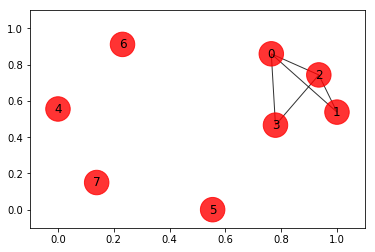

In [8]:


G=nx.Graph()
#add nodes to the graph
G.add_nodes_from(np.arange(0,n,1))

elist=[(0,1,1.0),(0,2,1.0),(0,3,1.0),(1,2,1.0),(2,3,1.0)]
# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)
colors = ['r' for node in G.nodes()]
default_axes = plt.axes(frameon=True)
default_axes.set_xlim(-0.1,1.1)
default_axes.set_ylim(-0.1,1.1)
nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, ax=default_axes)